In [20]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fz
from skfuzzy import control as ctrl

In [21]:
# Entradas
error_posicion = ctrl.Antecedent( np.arange(-15, 15, 0.1), 'error posicion')

vel_angular = ctrl.Antecedent(  np.arange(-10, 10, 0.1), 'vel angular')

# Salidas
torque = ctrl.Consequent( np.arange(-20, 20, 0.1), 'torque')

dir_angular = ctrl.Consequent(np.arange(-30, 30, 0.1), 'dir angular')


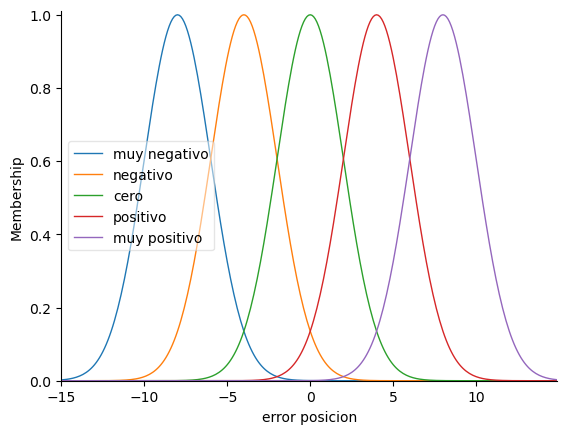

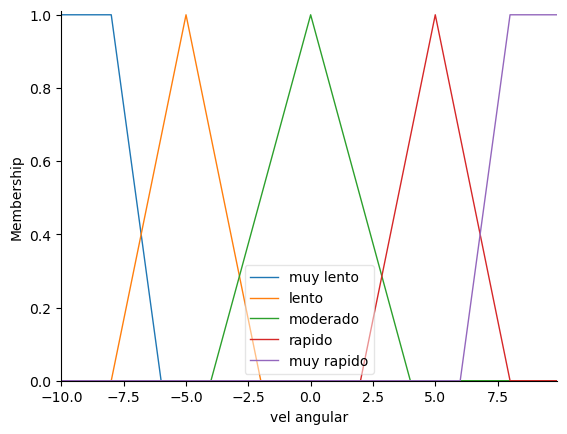

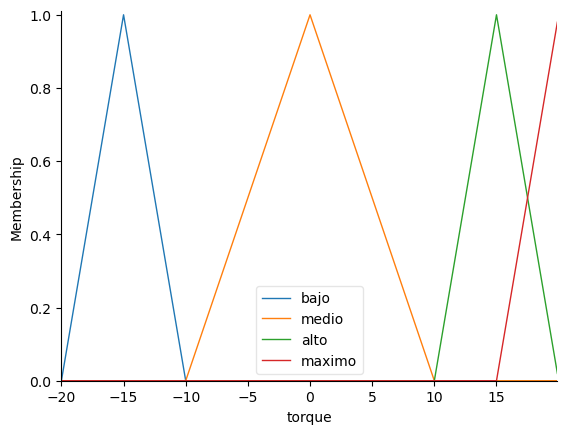

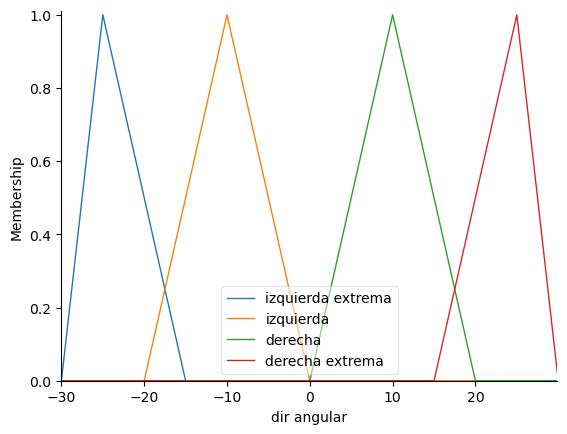

In [22]:
# Funciones de membresía - ENTRADA

# error
error_posicion['muy negativo'] = fz.gaussmf(error_posicion.universe, mean=-8, sigma=2)
error_posicion['negativo'] = fz.gaussmf(error_posicion.universe, mean=-4, sigma=2)
error_posicion['cero'] = fz.gaussmf(error_posicion.universe, mean=0, sigma=2)
error_posicion['positivo'] = fz.gaussmf(error_posicion.universe, mean=4, sigma=2)
error_posicion['muy positivo'] = fz.gaussmf(error_posicion.universe, mean=8, sigma=2)

# velocidad angular

vel_angular['muy lento'] = fz.trapmf(vel_angular.universe, [-10, -10, -8, -6])
vel_angular['lento'] = fz.trimf(vel_angular.universe, [-8, -5, -2])
vel_angular['moderado'] = fz.trimf(vel_angular.universe, [-4, 0, 4])
vel_angular['rapido'] = fz.trimf(vel_angular.universe, [2, 5, 8])
vel_angular['muy rapido'] = fz.trapmf(vel_angular.universe, [6, 8, 10, 10])

# Funciones de membresía - SALIDAS

# torque
torque['bajo'] = fz.trimf(torque.universe, [-20, -15, -10])
torque['medio'] = fz.trimf(torque.universe, [-10, 0, 10])
torque['alto'] = fz.trimf(torque.universe, [10, 15, 20])
torque['maximo'] = fz.trimf(torque.universe, [15, 20, 20])

# dirección angular

dir_angular['izquierda extrema'] = fz.trimf(dir_angular.universe, [-30, -25, -15])
dir_angular['izquierda'] = fz.trimf(dir_angular.universe, [-20, -10, 0])
dir_angular['derecha'] = fz.trimf(dir_angular.universe, [0, 10, 20])
dir_angular['derecha extrema'] = fz.trimf(dir_angular.universe, [15, 25, 30])

error_posicion.view()
vel_angular.view()
torque.view()
dir_angular.view()


In [23]:
# Rules
rule1 = ctrl.Rule(error_posicion['muy negativo'] & vel_angular['lento'], [torque['maximo'], dir_angular['izquierda extrema']])
rule2 = ctrl.Rule(error_posicion['muy negativo'] & vel_angular['moderado'], [torque['alto'], dir_angular['izquierda']])
rule3 = ctrl.Rule(error_posicion['cero'] & vel_angular['moderado'], [torque['medio']])
rule4 = ctrl.Rule(error_posicion['positivo'] & vel_angular['moderado'], [torque['alto'], dir_angular['derecha']])
rule5 = ctrl.Rule(error_posicion['muy positivo'] & vel_angular['muy rapido'], [torque['maximo'], dir_angular['derecha extrema']])


In [24]:
# Agrupar las reglas
reglas_gen = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])

reglas = ctrl.ControlSystemSimulation(control_system=reglas_gen, clip_to_bounds=True)


3.9901043213497185
9.997054004579084


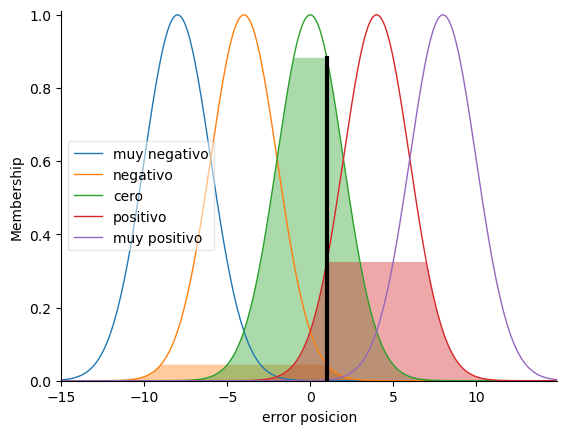

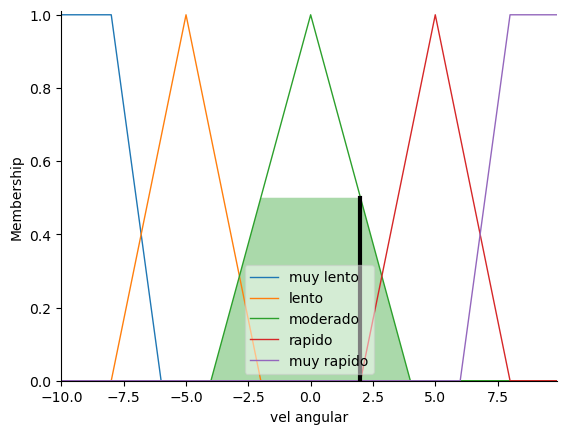

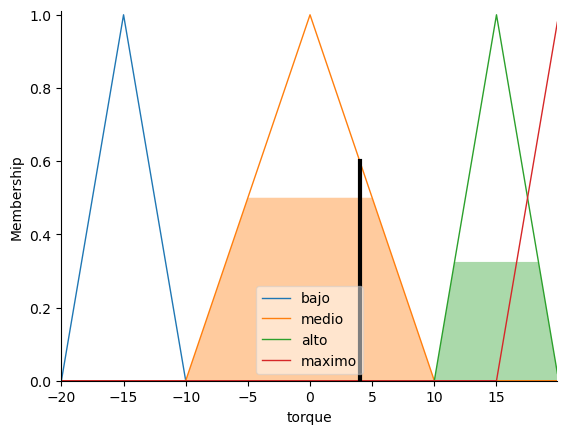

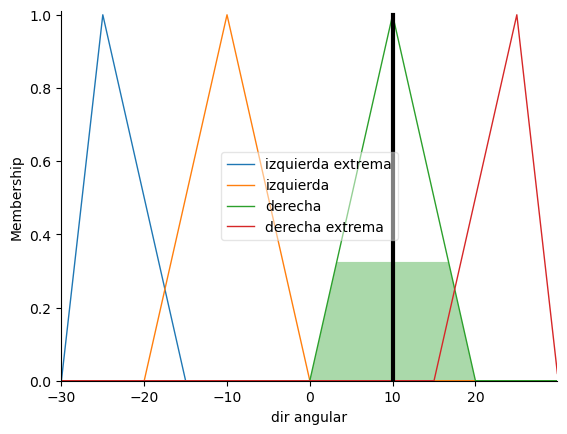

In [27]:
set_point = 3 # posición deseada
pos_salida = 2

error =  set_point - pos_salida

reglas.input['error posicion'] = error
reglas.input['vel angular'] = 2

reglas.compute()
print(reglas.output['torque'])
print(reglas.output['dir angular'])

error_posicion.view(sim=reglas)
vel_angular.view(sim=reglas)

torque.view(sim=reglas)
dir_angular.view(sim=reglas)